In [119]:
import pandas as pd
import numpy as np
import talib
from pandas_datareader import data
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [217]:
dataset = pd.read_csv('datasets/hdfc_updated2.csv')
dataset = dataset.dropna()
dataset = dataset[['Open', 'High', 'Low', 'Close']]

### Comment out different lines of the code below and run to experiment with indicators and get varied results and graphs below

In [246]:
#added 50 day moving average
dataset['MA50'] = talib.MA(dataset['Close'].values, timeperiod=50, matype=0)
        
#added bollinger bands
dataset['UPPERBAND'], dataset['MIDDLEBAND'], dataset['LOWERBAND'] = talib.BBANDS(dataset['Close'].values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

#relative strength index
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)

#williams %r
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

#chande momentum oscillator
#dataset['CMO'] = talib.CMO(dataset['Close'], timeperiod=14)

dataset['NextDayPrice'] = dataset['Close'].shift(-1)

In [247]:
dataset.dropna(inplace=True)

In [248]:
X_all = dataset.ix[:, dataset.columns != 'NextDayPrice']  # feature values for all days
y_all = dataset['NextDayPrice']  # corresponding targets/labels
print(X_all.head())  # print the first 5 rows

#Split the data into training and testing sets using the given feature as the target
split = int(len(dataset)-30)
X_train, X_test, y_train, y_test = train_test_split(X_all[:split], y_all[:split], test_size=0.30, random_state=42)

            Open         High          Low        Close         MA50  \
196  1392.900024  1396.250000  1384.500000  1390.099976  1265.625996   
197  1396.449951  1396.500000  1386.400024  1391.650024  1269.923997   
198  1394.550049  1396.000000  1376.250000  1380.099976  1273.887996   
199  1384.500000  1384.500000  1369.000000  1377.000000  1277.827996   
200  1376.800049  1389.900024  1373.099976  1380.750000  1281.980996   

           CMO    UPPERBAND   MIDDLEBAND    LOWERBAND        RSI  Williams %R  
196  47.187556  1426.737991  1339.025000  1251.312009  72.411988   -67.369573  
197  47.799881  1431.387397  1344.275000  1257.162603  72.916983   -48.124522  
198  35.219113  1434.553045  1347.995001  1261.436957  63.216592   -91.547812  
199  31.972171  1436.250051  1351.910004  1267.569956  60.775328   -84.718236  
200  34.035665  1438.443810  1355.395001  1272.346192  62.733830   -77.554909  


In [249]:
from sklearn.ensemble import RandomForestRegressor


#Create a decision tree regressor and fit it to the training set
regressor = RandomForestRegressor(n_estimators=10)

regressor.fit(X_train,y_train)

print ("Training set: {} samples".format(X_train.shape[0]))
print ("Test set: {} samples".format(X_test.shape[0]))

Training set: 185 samples
Test set: 80 samples


In [250]:
from sklearn import cross_validation

scores = cross_validation.cross_val_score(regressor, X_test, y_test, cv=10)
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))    

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE: %.4f" % mse)

Accuracy: 0.94 (+/- 0.04)
MSE: 257.7777


In [251]:
y_test.head()

375    1838.150024
311    1765.400024
292    1710.900024
220    1438.500000
205    1416.599976
Name: NextDayPrice, dtype: float64

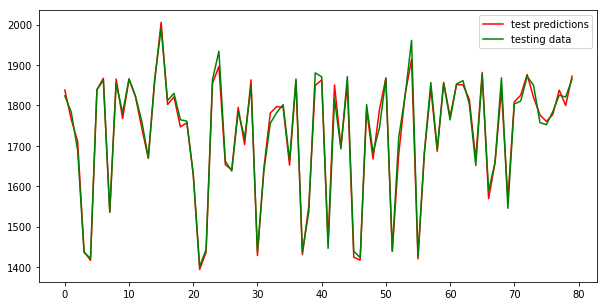

In [252]:
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test), color='r', label='test predictions')
plt.plot(np.array(regressor.predict(X_test)), color='g', label='testing data')
plt.legend()
plt.show()

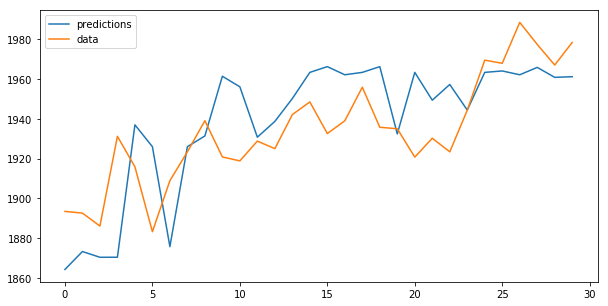

In [253]:
#X = dataset.tail(1).iloc[:,:8]
plt.figure(figsize=(10,5))
plt.plot(np.array(regressor.predict(X_all[split:])), label="predictions")
plt.plot(np.array(y_all[split:]), label="data")
plt.legend()

In [255]:
INDICATOR_MAE = np.sum(np.abs(np.array(regressor.predict(X_all[split:]) - np.array(y_all[split:]))))/30
print(INDICATOR_MAE)

20.430503709999986
